# Homework 3: Text Analysis of Bloomberg Articles

## Data Cleaning and EDA



## This Assignment

Welcome to Homework 3! For this assignment, we will work with Bloomberg news articles on Microsoft and Microsoft stock data (MSFT).

In this assignment, you will gain practice with:

- Conducting data cleaning and EDA on a text-based dataset,
- Manipulating data in `pandas` with the `datetime` and `string` accessors,
- Writing regular expressions and using `pandas` RegEx methods, and
- Performing sentiment analysis on text using DistilBERT.


In [63]:
# Run this cell to set up your notebook.
import warnings
warnings.simplefilter(action="ignore")

import re
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ds100_utils import *

# Ensure that pandas shows at least 280 characters in columns, so we can see full articles.
pd.set_option("max_colwidth", 280)
plt.style.use("fivethirtyeight")
sns.set()
sns.set_context("talk")

In this assignment, we will use the DistilBERT model, which is a Natural Language Processing (NLP) model designed to understand human language by processing text to capture the context and meaning of words within sentences. You are not expected to know the details of the model, but we will use it in this homework to perform sentiment analysis on textual data. We are importing those tools and the corresponding model below. **If you see any warnings, please ignore them. As long as the cell runs, it shouldn't be any issues.**

In [64]:
from transformers import pipeline
model_checkpoint = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"

### Score Breakdown

Question | Manual| Points
--- |---| ---
1a |No| 1
1b |No| 1
1c |No| 3
1d |Yes| 1
2a |No| 2
2b |No| 1
2c |No| 2
2di |No| 1
2dii |Yes| 1
3ai |No| 1
3aii |No| 1
3b |No| 2
3ci |No| 1
3cii |Yes| 1
**Total** | **3** | **19**

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Importing the Data

The data for this assignment is a subset of the financial news dataset from [this github repo](https://github.com/philipperemy/financial-news-dataset). The original datasets are no longer available online due to copyright issues, but we were allowed access for educational purposes. The data in the file `data/msft_bloomberg_news.txt` has been filtered to just Bloomberg articles published between 2010 to 2013 (inclusive) with text that contains "Microsoft" or "MSFT" (Microsoft's stock name).


<br>

---

### Question 1a

Let's examine the contents of the `data/msft_bloomberg_news.txt` file. Using the [`open` function](https://docs.python.org/3/library/functions.html#open) and [`read` operation](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects) on a `python` file object, read **the first 1000 characters** in `data/msft_bloomberg_news.txt` and store your result in the variable `q1a`. Then, display the result so you can read it.

**CAUTION: Viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file.**


In [65]:
q1a = open('/content/msft_bloomberg_news.txt', 'r')

q1a = q1a.read(1000)
print(q1a)

[{"id":46243185,"title":"Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover","released_at":"<date>May 29 2012<\/date> <time>09:40:58<\/time>","content":"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website  Pocket-Lint  reported that  Facebook Inc. (FB) \nmay try to acquire the company.  Opera gained as much as 26 percent, the biggest jump since\nit first sold shares in 2004. The Oslo-based company rose 18\npercent to 40.5 kroner at 11:37 a.m., giving it a market value\nof 4.85 billion kroner ($807 million).  Opera is the last major independent browser left, with the\nothers owned by companies such as  Microsoft Corp. (MSFT) ,  Google Inc. (GOOG)  \nand  Apple Inc. (AAPL) , said Aleksander Nilsen, an analyst at Abg Sundal\nCollier in Oslo. The company has a strong balance sheet, and\ncould be an attractive target for other companies, such as\n Mountain View , California-based Google, he said.  

<br>

---

### Question 1b

Based on the printed output you got from `q1a`, what format is the data in? Answer this question by entering the letter corresponding to the right format in the variable `q1b` below.

**CAUTION: As a reminder, viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file, and do not use the file explorer to open data files directly.**

**A.** CSV<br/>
**B.** HTML<br/>
**C.** JavaScript Object Notation (JSON)<br/>
**D.** Excel XML

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, `"C"`, or `"D"`.


In [66]:
q1b = 'C'

<br>

---

### Question 1c

`pandas` has built-in readers for many different file formats, including the file format used here to store news articles. To learn more about these, check out the documentation for

- `pd.read_csv` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- `pd.read_html`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)
- `pd.read_json`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)
- `pd.read_excel`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).

For this question, use one of these functions to:
1. Load the file `msft_bloomberg_news.txt` in the data folder as a `DataFrame` into the variable `msft_news_df`.
2. Set the **index** of `msft_news_df` to correspond to the `id` of each news article.


**Hint:** If your code is taking a while to run, you should review your answers to `q1a` and `q1b`; you may have used the incorrect data loading function for the type of the given file.

In [67]:
msft_news_df = pd.read_json('/content/msft_bloomberg_news.txt')
msft_news_df.head(1)

,id,title,released_at,content,path
0,46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website Pocket-Lint reported that Facebook Inc. (FB) \nmay try to acquire the company. Opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt


<!-- BEGIN QUESTION -->

<br>

---

### Question 1d

Suppose we are interested in using the news to predict future stock values. What additional data would we need to predict stock prices, and how could we connect that data to news articles? In addition, what attributes or characteristics of the news might help predict the stock value?

Com base na questão 1, um dado adicional que poderia ajudar seria todo o histórico de mercado das empresas. E como o artigo fornece o horário em que a Opera aumentou o seu valor de mercado, o atributo hora pode ser útil para prever futuros valores de mercado, pois ações e valores de mercado estão sempre mudando

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## Question 2: Time Analysis

After loading in the data, we can start exploring news articles by analyzing the relationships between the release dates (date of publication) and different topics and companies.

<br>


---

### Question 2a

First, let's extract the date and time from the `released_at` column in `msft_news_df`. Notice that the date and time are encoded in the following format:

```
<date>May 29 2012</date> <time>09:40:58</time>
<date>May 18 2011</date> <time>22:42:40</time>
<date>August 15 2012</date> <time>00:09:02</time>
<date>July 1 2011</date> <time>22:12:37</time>
...
```

There are several ways to convert this to a `Timestamp` object that we can use more easily. However, for this assignment, we are going to use string manipulation functions.

Create a regular expression that extracts the Month, Day, Year, Hour, Minute, and Second from the `msft_news_df["released_at"]` column. You should create a new `DataFrame` called `dates` that contains:
1. The same index as `msft_news_df` (`id`) and
2. Column labels: `"Month"`, `"Day"`, `"Year"`, `"Hour"`, `"Minute"`, `"Second"`.

Additionally, convert all numerical values (`"Year"`, `"Day"`, `"Hour"`, `"Minute"`, `"Second"`) to type `int`.

**Hint 1:** You should use the [`Series.str.extract`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html) function.

**Hint 2:** Don't forget to use raw strings and capture groups. Copy the above example text into [regex101.com](https://regex101.com/) to experiment with your regular expressions.

**Hint 3:** It might be helpful to break this up into a couple of steps (e.g., first extract date values such as Month, Day, and Year and then extract time values such as Hour, Minute, and Second).

In [68]:
dates = msft_news_df['released_at']

mes = dates.str.extract(r'<date>(?P<letter>\w+)')
dia = dates.str.extract(r'(\d+)').astype(int)
ano = dates.str.extract(r'(\d{4})</date>').astype(int)
hora = dates.str.extract(r'<time>(\d{2})').astype(int)
min = dates.str.extract(r':(\d{2}):').astype(int)
seg = dates.str.extract(r':(\d{2})</time>').astype(int)

dates = pd.DataFrame(dates)
dates['Month'] = mes
dates['Day'] = dia
dates['Year'] = ano
dates['Hour'] = hora
dates['Minute'] = min
dates['Second'] = seg

dates

,released_at,Month,Day,Year,Hour,Minute,Second
0,<date>May 29 2012</date> <time>09:40:58</time>,May,29,2012,9,40,58
1,<date>May 18 2011</date> <time>22:42:40</time>,May,18,2011,22,42,40
2,<date>August 15 2012</date> <time>00:09:02</time>,August,15,2012,0,9,2
3,<date>July 1 2011</date> <time>22:12:37</time>,July,1,2011,22,12,37
4,<date>January 18 2012</date> <time>01:20:28</time>,January,18,2012,1,20,28
...,...,...,...,...,...,...,...
4630,<date>June 27 2012</date> <time>00:35:58</time>,June,27,2012,0,35,58
4631,<date>September 24 2013</date> <time>13:38:57</time>,September,24,2013,13,38,57
4632,<date>September 14 2011</date> <time>04:01:00</time>,September,14,2011,4,1,0
4633,<date>June 28 2010</date> <time>01:00:00</time>,June,28,2010,1,0,0


<br>

---

### Question 2b

Now that we've figured out how to extract dates, create a new `DataFrame` called `msft_news_2010` that only contains articles released in 2010. This `DataFrame` should contain:
1. An index of `id` and
2. Columns: `"title"`, `"released_at"`, `"content"`, `"path"`, `"Month"`, `"Day"`, and `"Year"`.

**Hint:** Consider merging `msft_news_df` with `dates`.

In [69]:
msft_news_2010 = msft_news_df.loc[dates['Year'] == 2010].merge(dates)

msft_news_2010

,id,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second
0,95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,23,52,36
1,75227517,"Republican Win May Be Tax Boon for Companies, High Incomes",<date>November 3 2010</date> <time>16:46:00</time>,"Americans with the highest incomes\nand U.S. corporations, especially those with international\noperations, stand to be big winners as newly elected\ncongressional Republicans signal they will extend existing tax\nbenefits and push for new ones. Republicans will use their ne...",./2008_2012_msft_bloomberg_news/republican-sweep-may-mean-tax-boon-for-u-s-multinationals-high-incomes.txt,November,3,2010,16,46,0
2,57850804,Alibaba Says It Now Offers Sohu’s Search Engine,<date>October 29 2010</date> <time>12:23:43</time>,"Alibaba Group Holding Ltd. said\nusers of its search-engine service may now access technology\nsupplied by Sohu.com Inc. , as the two Chinese companies \nstrengthen collaboration to challenge industry leader Baidu Inc. Users of Alibaba’s Etao.com search service may now o...",./2008_2012_msft_bloomberg_news/alibaba-says-it-now-offers-sohu-s-search-engine.txt,October,29,2010,12,23,43
3,75532360,Slim Solution for Trade Imbalances Is More Buying by China,<date>October 31 2010</date> <time>16:05:40</time>,"Billionaire Carlos Slim , the world’s\nrichest man, said China must buy more and the U.S. needs to step\nup private investment to reduce the trade imbalance and boost\ntheir economies. Global currency devaluation efforts will fail in the\nabsence of economic policies that f...",./2008_2012_msft_bloomberg_news/slim-solution-for-trade-imbalances-is-more-buying-by-china-u-s-investing.txt,October,31,2010,16,5,40
4,10176588,"S&P 500 to Defy `New Normal' and Rally 17%, Cambiar's Barish Says",<date>December 1 2010</date> <time>20:38:58</time>,"Energy and industrial companies will\nrise next year, propelling a 17 percent gain in the Standard &\nPoor’s 500 Index from its current level, according to Cambiar\nInvestors LLC’s Brian Barish . Next year will be marked by a “multi-speed recovery” as\nindustries weakened b...",./2008_2012_msft_bloomberg_news/s-p-500-to-defy-pimco-s-new-normal-rise-17-by-end-of-2011-barish-says.txt,December,1,2010,20,38,58
...,...,...,...,...,...,...,...,...,...,...,...
573,95653167,Apple to Open Digital Store for Mac Computer Apps,<date>December 16 2010</date> <time>21:57:29</time>,"Apple Inc. will open a digital\nstorefront next month that will try to do for computer software\nwhat it did for music and mobile applications. The Mac App Store will open Jan. 6, the Cupertino,\nCalifornia-based company said in a statement today. The aim is\nto let Mac own...",./2008_2012_msft_bloomberg_news/apple-aims-to-do-for-computer-software-what-it-did-for-mobile-music-apps.txt,December,16,2010,21,57,29
574,44065090,Buffett Donates $1.6 Billion in Biggest Gift Since 2008 Crisis,<date>July 6 2010</date> <time>04:00:03</time>,"Warren Buffett , the billionaire who\nhas promised to give away 99 percent of his fortune to charity,\nmade his largest donation since the 2008 financial crisis after\nprofits at his Berkshire Hathaway Inc. jumped. \n The value of Buffett’s annual gift to the foundation\ne...",./2008_2012_msft_bloomberg_news/buffett-donates-most-since-2008-after-urging-wealthiest-to-increase-giving.txt,July,6,2010,4,0,3
575,12166320,Nintendo Bars Children Under 6 From Viewing 3-D Images on New Game Player,<date>December 30 2010</date> <time>01:47:51</time>,"Nintendo Co. will bar children ages\n6 and younger from using the

<br>

---

### Question 2c

After processing the article release dates, we can analyze articles about different topics and companies. Note that all the articles in the provided dataset mention Microsoft/MSFT, but they can also mention other companies.


For each company in the list of `companies` (provided below), add a boolean column to the `msft_news_df` `DataFrame` indicating whether the corresponding company is mentioned in the text of the article. Ultimately, you should add six new columns containing `True`/`False` values to the `DataFrame`: `"amazon"`, `"nintendo"`, `"apple"`, `"sony"`, `"facebook"`, `"netflix"`. You may use a for loop over the list of companies.

**Note:** Make the contents of the articles lowercase before searching for the keywords.

In [70]:
companies = ["amazon", "nintendo", "apple", "sony", "facebook", "netflix"]

msft_news_df['content'] = msft_news_df['content'].str.lower()

for i in companies:
    msft_news_df[i] = msft_news_df['content'].str.contains(i)

msft_news_df

,id,title,released_at,content,path,amazon,nintendo,apple,sony,facebook,netflix
0,46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"opera software asa (opera) , the norwegian\nmarker of internet browsers, surged the most on record in oslo\nafter technology website pocket-lint reported that facebook inc. (fb) \nmay try to acquire the company. opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt,False,False,True,False,True,False
1,73522879,Microsoft Calls Intel’s Comments on Next Windows ‘Inaccurate’,<date>May 18 2011</date> <time>22:42:40</time>,"microsoft corp. (msft) said comments made by\nan intel corp. (intc) executive yesterday about future version of its\nwindows operating system were “factually inaccurate and\nunfortunately misleading.” renee james, head of intel’s software business, said\nyesterday that mi...",./2008_2012_msft_bloomberg_news/icrosoft-calls-intel-s-comments-on-next-windows-inaccurate-.txt,False,False,False,False,False,False
2,29296500,Lawyers Raking in Cash as Campaign Spending Hits Records,<date>August 15 2012</date> <time>00:09:02</time>,"every four years, a new mix of politicians assembles to compete for the opportunity to run for president. while the candidates’ names and faces change, the lawyers stay the same. attorney michael toner began his presidential-campaign legal career in 1996 working for republic...",./2008_2012_msft_bloomberg_news/awyers-raking-in-cash-as-campaign-spending-hits-records.txt,False,False,False,False,False,False
3,49799724,"Microsoft, Google Sued by Louisiana Firm Over Computer-Mapping Technology",<date>July 1 2011</date> <time>22:12:37</time>,"microsoft corp. (msft) and google inc. (goog) were\naccused of violating a louisiana company’s patent covering\nmapping technology that helps computer users see locations in\nthree dimensions. officials of transcenic inc. contend in a lawsuit that\nexecutives of google,...",./2008_2012_msft_bloomberg_news/icrosoft-google-sued-over-technology-providing-computer-maps.txt,False,False,False,False,False,False
4,20739032,Yahoo Co-Founder Jerry Yang Exits Company,<date>January 18 2012</date> <time>01:20:28</time>,"jerry yang is exiting the yahoo!\ninc (yhoo) . board and its management team, the latest casualty of an\noverhaul that led to the ouster of chief executive officer carol\nbartz and left the company in search of strategic options. yang, who started yahoo in 1995 with dav...",./2008_2012_msft_bloomberg_news/yahoo-says-co-founder-jerry-yang-resigns.txt,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4630,75325873,Dolby to Purchase San Francisco Tower for $109.8 Million,<date>June 27 2012</date> <time>00:35:58</time>,"dolby laboratories inc. (dlb) , the audio-\ntechnology company whose products are used in cinemas, recording\nstudios and video games, agreed to buy a 16-story tower in the\n san francisco area that’s home to twitter inc., and will make\nthe building its new headquarters. t...",./2008_2012_msft_bloomberg_news/dolby-to-purchase-san-francisco-tower-for-109-8-million.txt,False,False,False,False,False,False
4631,49071474,Mayfair Office Squeeze Spawns New London Real Estate Hubs,<date>September 24 2013</date> <time>13:38:57</time>,"mayfair and st. james’s just aren’t\nbig enough for all the companies that want a piece of london’s\nmost expensive neighborhoods. many are now settling for less\nprestigious city-center addresses, creating new hot spots in the\noffice-property market. buildings are sproutin...",./2008_2012_msft_bloomberg_news/ayfair-office-squeeze-spawns-new-london-real-estate-hubs.txt,True,False,False,False,False,False
4632,12417018,Only Half of U.S. Corporate Cash Stays at Home: Chart of the Day,<date>September 14 2011</date> <time>04:01:00</time>,"cash levels for u.s. companies are\nlosing their meanin

<br>

---

### Question 2d

Now, we can put everything together to analyze the release dates and volume of articles for different companies.


#### Question 2d, Part i

Create a new `DataFrame` called `year_news` that contains the number of articles mentioning each company in the list `companies` after 2010 (inclusive). `year_news` should have six columns (one column for each company), and the index of this `DataFrame` should be the release year `"Year"`.

In [71]:
year_news = msft_news_df.loc[dates['Year'] >= 2010].merge(dates)
year_news = year_news.groupby('Year')[companies].sum()

year_news.head()

,amazon,nintendo,apple,sony,facebook,netflix
Year,,,,,,
2010,41,28,198,55,74,9
2011,102,29,491,105,163,43
2012,186,47,796,103,281,41
2013,158,94,723,201,254,51


<!-- BEGIN QUESTION -->

#### Question 2d, Part ii

Given your code in the previous part is correct, after running the cell below, you should be able to see the number of articles released mentioning `companies` for each year. The plot should look like this:
<center>
<img src = "num_articles.png" width = "500">
</center>

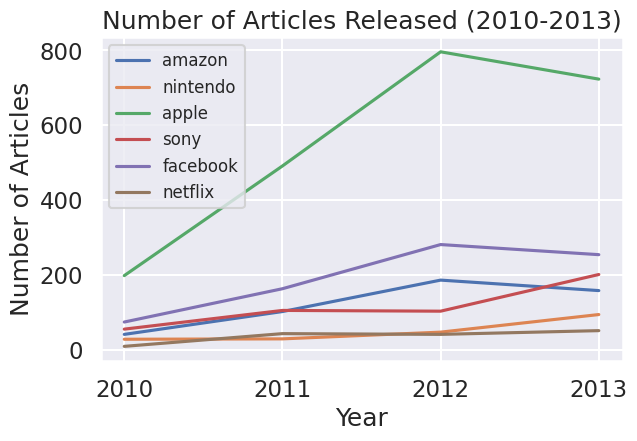

In [72]:
plt.figure(figsize=(6, 4))

for company in companies:
    sns.lineplot(data=year_news.reset_index(),
                 x="Year",
                 y=company,
                 label=company)
plt.legend(fontsize="12")
plt.xticks(np.arange(2010, 2014), np.arange(2010, 2014))
plt.ylabel("Number of Articles")
plt.xlabel("Year")
plt.title("Number of Articles Released (2010-2013)");

What trends do you notice in the plot above? Feel free to reference or Google any events to explain the trends seen in the graph. What are some limitations of using data and the corresponding plot to analyze the performance of different companies or trends?

**Hint:** Remember the source of the articles and the subset of the articles we are analyzing in this assignment.

O gráfico demonstra o crescimento que as empresas tiverem depois de 2010, como pode ser percebido pelos dados da Apple que tiveram um pico mais alto em 2012 com o lançamento do iPhone 5, que foi o primeiro lançado depois da morte do Steve Jobs e que foi um sucesso de vendas

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## Question 3: Sentiment Analysis

In this section, we will continue building on our past analysis and specifically look at the **sentiment of each article** —— this will lead us to a much more direct and detailed understanding of how these articles can be used in different applications. **Sentiment analysis** is generally the computational task of classifying the emotions in a body of text as positively or negatively charged.


We will use a fine-tuned version of the **DistilBERT** model ([github](https://github.com/huggingface/transformers/tree/main/examples/research_projects/distillation), [original paper](https://arxiv.org/abs/1910.01108)) to analyze the sentiment of Bloomberg news articles. DistilBERT is a neural network-based language model (a close relative to ChatGPT); we will use the model checkpoint specifically trained for sentiment analysis. These models are not in scope for Data 100, and we don't expect you to know how they work; take CS182: Neural Networks or Data 102: Data, Inference, and Decisions if you're interested in learning more. We are using them here to show how easy (and useful) these technologies have become.

We can use the [HuggingFace library](https://huggingface.co/) to build the sentiment analysis pipeline and load the model. [Here](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english) is the card of the model checkpoint we will use for this assignment: the model card contains general information about the model, including the base model used, training arguments, training data, etc. Again, you don't need to know this for the course but knowing about model cards is important when you start to use these techniques in your careers.

Run the following two cells to set up the sentiment analysis pipeline and see examples of how we can get the sentiment for different strings.

In [73]:
# Load the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_checkpoint)

# Get the sentiment of a given string
sentiment_1 = sentiment_analysis("I have two dogs.")
print("Example 1: " + str(sentiment_1))

sentiment_2 = sentiment_analysis("I do not have dogs.")
print("Example 2: " + str(sentiment_2))

sentiment_3 = sentiment_analysis("Fortunately, I do not have dogs to worry about.")
print("Example 3: " + str(sentiment_3))

Device set to use cpu


Example 1: [{'label': 'POSITIVE', 'score': 0.9955033659934998}]
Example 2: [{'label': 'NEGATIVE', 'score': 0.9987561702728271}]
Example 3: [{'label': 'POSITIVE', 'score': 0.9975079298019409}]


As you can see, the model can determine the sentiment of phrases/sentences (not just words). The model measures the phrase's **polarity**, indicating how strongly negative or positive it is on a scale of 0 to 1.

**Note:** The output is a list, and each element of the list is a dictionary with two keys (label and score). Note that we could have gotten the sentiments of the two sentences by putting them in a list (batch) and then running the pipeline once (see the code below).


In [74]:
sentiments = sentiment_analysis(["I have two dogs.", "I do not have dogs."])
print(sentiments)

[{'label': 'POSITIVE', 'score': 0.9955033659934998}, {'label': 'NEGATIVE', 'score': 0.9987561702728271}]


---

### Question 3a

As running all the articles through the model will take a while, let's first focus on articles released in 2010. We have already filtered these articles in `q2b` and assigned them to the `DataFrame` `msft_news_2010`.

Due to model input size constraints, a maximum of 512 words (tokens), and limited computational resources on Datahub, we cannot load the full articles into the pipeline. Instead, we can look at the first sentence that mentions Microsoft in each article.

#### Question 3a, Part i

Assign `microsoft_re` to a regular expression that captures sentences referencing "microsoft" or "msft" (in lowercase). You should assume all sentences end with `.`, `?`, or `!` and that these punctuation characters are not used for any other purpose. This is of course not true in practice (e.g., this example! and 3.14), but we will often make these simplifying assumptions to enable progress in data analysis.

You should develop and test your regular expression using [regex101.com](https://regex101.com/). Here are some practice sentences.

```
have you ever worked at microsoft? i once did. microsoft is known for
their research in ai.
```


Then:
1. Canonicalize the `"content"` of the articles by converting the text to lowercase,
2. Use the `microsoft_re` regular expression to extract the first sentence mentioning "microsoft" or "msft" in each article, and
3. Create a new column `first_sentence` in `msft_news_2010` with these values.


**Hint 1:** `Series.str.findall` function might be useful (might take around a minute to run).

**Hint 2:** Consider using the negation character class `r"[^.!?]"`

**Hint 3:** Some sentences will wrap across lines and the `.` will not match across new lines.

In [75]:
msft_news_2010['content'] = msft_news_2010['content'].str.lower()

microsoft_re = msft_news_2010['content'].str.extract(r'([^.?!]*\b(?:microsoft|msft)\b[^.?!]*[.?!])')[0]
microsoft_re = pd.DataFrame(microsoft_re)

msft_news_2010['first_sentence'] = microsoft_re
msft_news_2010.head(1)

,id,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,first_sentence
0,95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"netflix inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the los gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,23,52,36,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said."


#### Question 3a, Part ii

Using the `sentiment_analysis` model, let's now determine the sentiment of the first sentence that mentions "microsoft" or "msft" for each article. Note that the model outputs both a label and a score. Provide just the score, which should be converted to a negative number if the label is "NEGATIVE". Add a new column `sentence_sentiment` to `msft_news_2010` with these values.

**Note 1:** Feel free to reference the start of `q3` to understand what `sentiment_analysis` can take in and what it outputs. `sentiment_analysis` may take 1-2 minutes to run when calculating scores for all the sentences.

**Note 2:** Given `sentiment_analysis` can take a while to run, feel free to create an additional cell when working with the sentiment scores. Once you've come up with your solution, please consolidate your code into one cell and delete the additional cell created to avoid any autograder issues.  

In [76]:
sentiment_analysis(msft_news_2010['first_sentence'][0])

[{'label': 'NEGATIVE', 'score': 0.9986212253570557}]

In [77]:
sentimentos = []
score = []

for i in msft_news_2010['first_sentence'].astype(str):
  sentimentos.append(sentiment_analysis(i[0])[0])


for i in sentimentos:
  if i.get('label') ==  'POSITIVE':
    score.append(i['score'])
  else:
    score.append(-i['score'])

score

[0.7481208443641663,
 0.8923606872558594,
 0.9845702052116394,
 0.9255135655403137,
 0.7481208443641663,
 0.9475017189979553,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.9309634566307068,
 0.9255135655403137,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.9475017189979553,
 0.7481208443641663,
 0.7481208443641663,
 0.9845702052116394,
 0.8923606872558594,
 0.9309634566307068,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.9475017189979553,
 0.7481208443641663,
 0.8923606872558594,
 0.9475017189979553,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.9797317385673523,
 0.8923606872558594,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.7481208443641663,
 0.9854032993

In [78]:
msft_news_2010['sentence_sentiment'] = score
msft_news_2010.head(1)

,id,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,first_sentence,sentence_sentiment
0,95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"netflix inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the los gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,23,52,36,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",0.748121


<br>

---

### Question 3b

We can now turn to an alternative, more accurate way of determining the sentiment score of articles —— getting the sentiment based on the entire text, rather than getting sentiment based on the first sentence including "microsoft" or "msft" in the text. Let's load in `data/article_sentiment_logs.csv`, which contains sentiment scores of the full articles as a `DataFrame` `full_sentiments`. In this file, you are provided with logs which include the `id`, `score`, and `label` ("N" for "NEGATIVE" and "P" for "POSITIVE") in the following format:

```
<device:1> <id:77243971> <result: [0.9963290095329285 (N)]>
<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
<device:1> <id:43064156> <result: [0.997868537902832 (N)]>
<device:1> <id:29402508> <result: [0.9924335479736328 (N)]>
...
```

Run the following cell to load in the `DataFrame` and see what it contains:

In [79]:
# Run this cell; no further action is needed
full_sentiments = pd.read_csv('/content/article_sentiment_logs.csv')
full_sentiments.head()

,RunNum,log
0,0,<device:0> <id:77243971> <result: [0.9963290095329285 (N)]>
1,1,<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
2,2,<device:0> <id:43064156> <result: [0.997868537902832 (N)]>
3,3,<device:0> <id:29402508> <result: [0.9924335479736328 (N)]>
4,4,<device:0> <id:71427879> <result: [0.9897157549858093 (N)]>


Using the logs, modify `full_sentiments` so it ultimately just contains the `id` and `content_score` (a number ranging from -1 to 1). Then, merge this with `msft_news_2010` so we can see the results of our two methods of calculating sentiment side by side. Assign this merged `DataFrame` to `msft_scores_2010`. After the merge, make sure that only articles from 2010 appear and that the index of the `DataFrame` is the article `id`.

**Note 1:** You need to negate the score of negatively classified articles (indicated by "N").

**Note 2:** If you run into issues when merging, you may need to reset `full_sentiments` by running the above cell again.

**Hint 1:** The articles have a primary key `id`.

**Hint 2:** Feel free to reference how you calculated sentiment scores in `q3aii`.

In [80]:
teste = pd.DataFrame()

teste['id_senti'] = full_sentiments['log'].str.extract(r'<device:0> <id:(\d+)').dropna()
teste['id_senti'] = teste['id_senti'].astype(int)
teste['content_score'] = full_sentiments['log'].str.extract(r'<device:0> <id:\d+> <result: \[(\d\.\d+)')

full_sentiments = teste
full_sentiments

,id_senti,content_score
0,77243971,0.9963290095329285
1,14799046,0.9980687499046326
2,43064156,0.997868537902832
3,29402508,0.9924335479736328
4,71427879,0.9897157549858093
...,...,...
4626,44194854,0.9751061201095581
4627,84449274,0.994696855545044
4628,26925649,0.9863374829292297
4632,34512603,0.9963667392730713


In [81]:
msft_scores_2010 = pd.concat([msft_news_2010, full_sentiments], axis=1)
msft_scores_2010 = msft_scores_2010.set_index('id')
msft_scores_2010.head(1)

,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,first_sentence,sentence_sentiment,id_senti,content_score
id,,,,,,,,,,,,,,
95357231.0,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"netflix inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the los gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21.0,2010.0,23.0,52.0,36.0,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",0.748121,77243971.0,0.9963290095329285


<br>

---

### Question 3c

Let's dive deeper into our two methods of calculating sentiment and analyze the accuracy of the method used in `q3b`.


#### Question 3c, Part i

Calculate the difference between `content_score` and `sentence_sentiment`. Create a new column `sentiment_difference` in our `DataFrame` `msft_scores_2010` with these values.


In [82]:
msft_scores_2010['sentiment_difference'] = msft_scores_2010['content_score'].astype(float) - msft_scores_2010['sentence_sentiment']
msft_scores_2010.head(1)

,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,first_sentence,sentence_sentiment,id_senti,content_score,sentiment_difference
id,,,,,,,,,,,,,,,
95357231.0,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"netflix inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the los gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21.0,2010.0,23.0,52.0,36.0,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",0.748121,77243971.0,0.9963290095329285,0.248208


<!-- BEGIN QUESTION -->

#### Question 3c, Part ii

Below we have provided a plot looking at these differences. Comment on why we see differences when calculating the sentiment of an article as the sentiment of the first sentence mentioning "microsoft" or "msft" in the article versus the sentiment of the entire article itself. How does context play a role when evaluating the sentiment of a text?

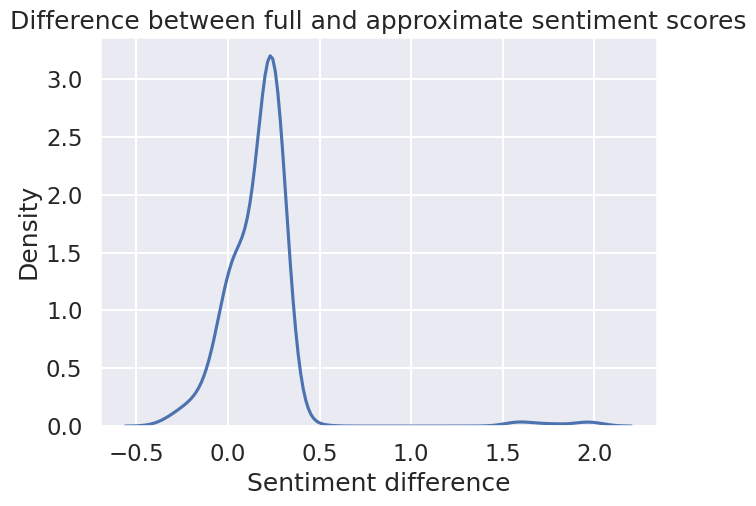

In [85]:
sns.kdeplot(msft_scores_2010['sentiment_difference'])
plt.xlabel('Sentiment difference')
plt.title('Difference between full and approximate sentiment scores');

A diferença ocorre porque uma única frase não define um texto inteiro. Um texto deve sempre ser lido do começo ao fim para que garantir que a uma frase não esteja fora de contexto.

A célula abaixo não funciona, ela está em modo de leitura e não consigo nem modificar e nem apagar

In [84]:
# Run this cell; no further action is needed
full_sentiments = pd.read_csv('data/article_sentiment_logs.csv')
full_sentiments.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/article_sentiment_logs.csv'